In [40]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',100)

from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder






In [42]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [43]:
train.shape

(307511, 122)

In [44]:
test.shape

(48744, 121)

In [45]:
data =pd.concat( [train,test] , ignore_index= True)

In [46]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [47]:
data['TARGET'].value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

In [48]:
data.shape

(356255, 122)

In [49]:
data.select_dtypes(np.number)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [50]:
data.info(max_cols= 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    356255 non-null  int64  
 1    TARGET                        307511 non-null  float64
 2    NAME_CONTRACT_TYPE            356255 non-null  object 
 3    CODE_GENDER                   356255 non-null  object 
 4    FLAG_OWN_CAR                  356255 non-null  object 
 5    FLAG_OWN_REALTY               356255 non-null  object 
 6    CNT_CHILDREN                  356255 non-null  int64  
 7    AMT_INCOME_TOTAL              356255 non-null  float64
 8    AMT_CREDIT                    356255 non-null  float64
 9    AMT_ANNUITY                   356219 non-null  float64
 10   AMT_GOODS_PRICE               355977 non-null  float64
 11   NAME_TYPE_SUITE               354052 non-null  object 
 12   NAME_INCOME_TYPE            

In [51]:
# missing values
(data.isnull().sum()[data.isnull().sum()>0] / data.shape[0]) *100

TARGET                          13.682334
AMT_ANNUITY                      0.010105
AMT_GOODS_PRICE                  0.078034
NAME_TYPE_SUITE                  0.618377
OWN_CAR_AGE                     66.031635
OCCUPATION_TYPE                 31.437032
CNT_FAM_MEMBERS                  0.000561
EXT_SOURCE_1                    54.430113
EXT_SOURCE_2                     0.187506
EXT_SOURCE_3                    19.545831
APARTMENTS_AVG                  50.511010
BASEMENTAREA_AVG                58.268375
YEARS_BEGINEXPLUATATION_AVG     48.522266
YEARS_BUILD_AVG                 66.330578
COMMONAREA_AVG                  69.714109
ELEVATORS_AVG                   53.074343
ENTRANCES_AVG                   50.078455
FLOORSMAX_AVG                   49.498533
FLOORSMIN_AVG                   67.678489
LANDAREA_AVG                    59.183450
LIVINGAPARTMENTS_AVG            68.203674
LIVINGAREA_AVG                  49.936703
NONLIVINGAPARTMENTS_AVG         69.293343
NONLIVINGAREA_AVG               54

In [52]:
data.shape[0]

356255

In [53]:
data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [54]:
num_col = data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE'
          ,'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_2',
          'EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
        'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
           'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
           'FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE'
          ,'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
            'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI',
           'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','DAYS_LAST_PHONE_CHANGE']]

In [55]:
num_col.shape

(356255, 57)

In [56]:
cat_col = data[['CNT_CHILDREN','NAME_TYPE_SUITE','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
           'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
          'NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
           'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
           'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
           'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
           'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
           'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
           'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
          ]]

In [57]:
cat_col.shape

(356255, 63)

In [58]:
data.shape

(356255, 122)

## Univariante Analysis

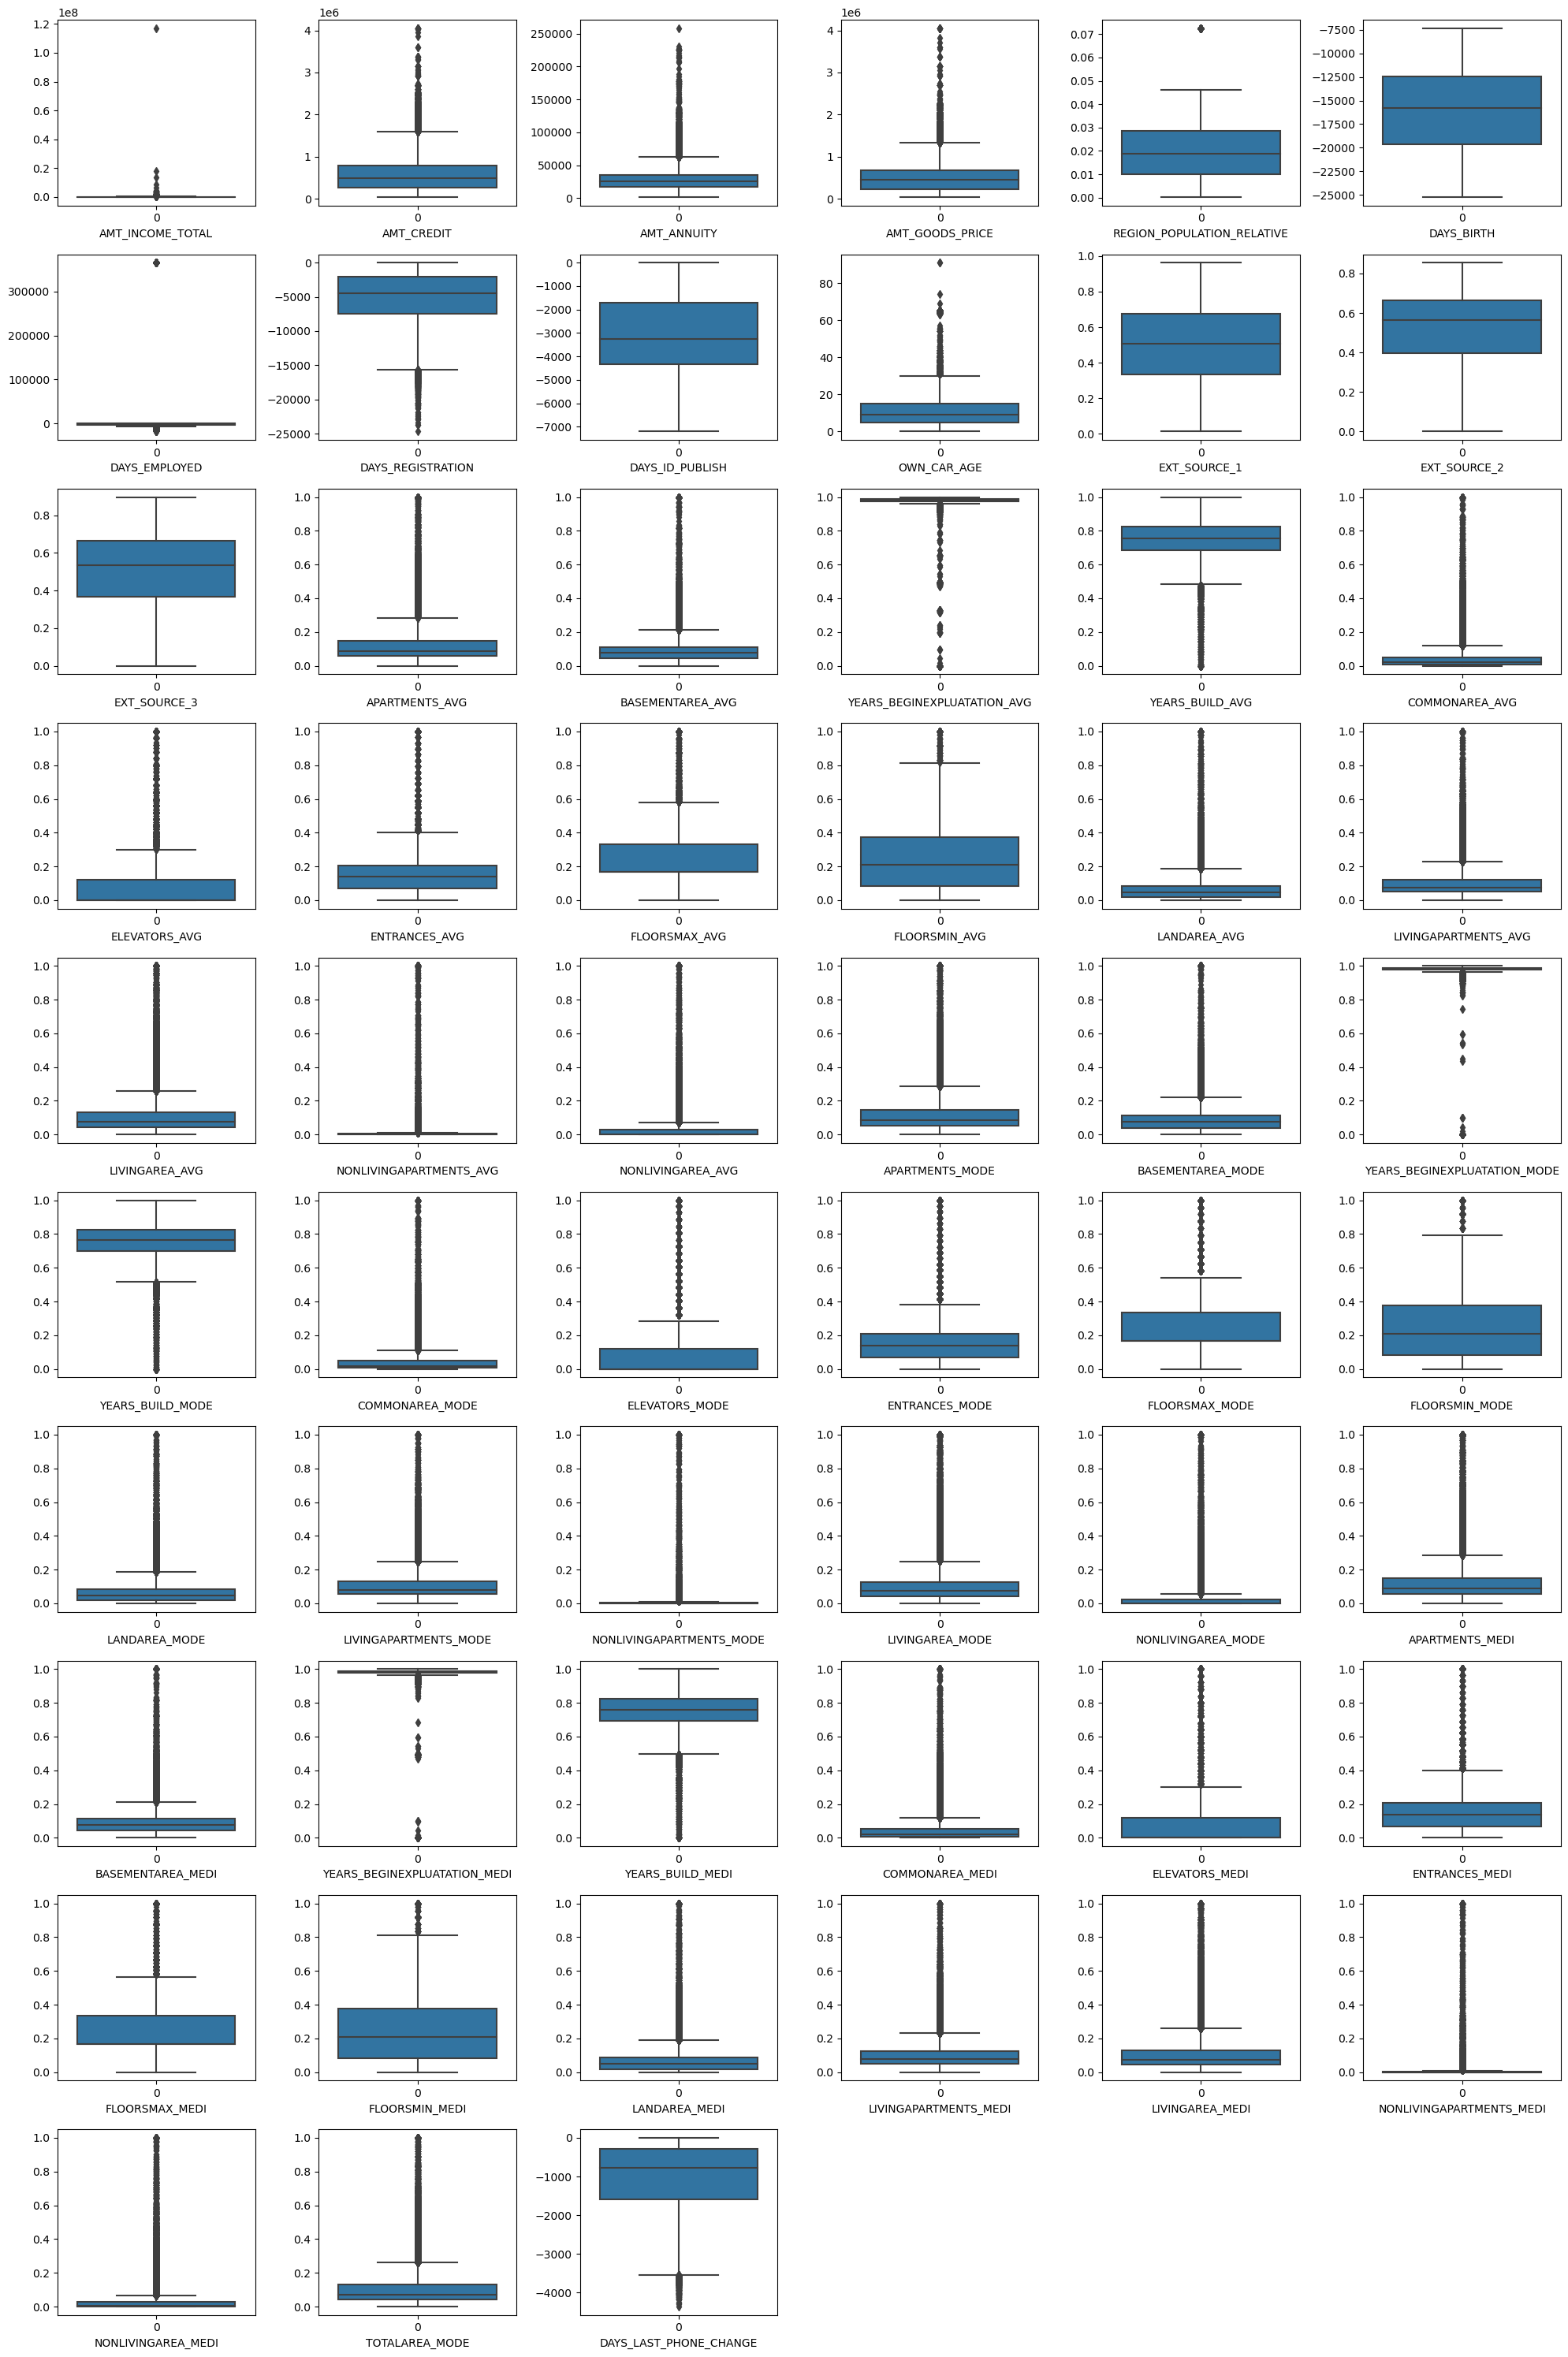

In [59]:
t = 1
plt.figure(figsize=(20,30))
for i in num_col.columns:
    plt.subplot(10,6,t)
    sns.boxplot(data[i])
    plt.xlabel(i)
    t = t+1
plt.tight_layout()
plt.show()

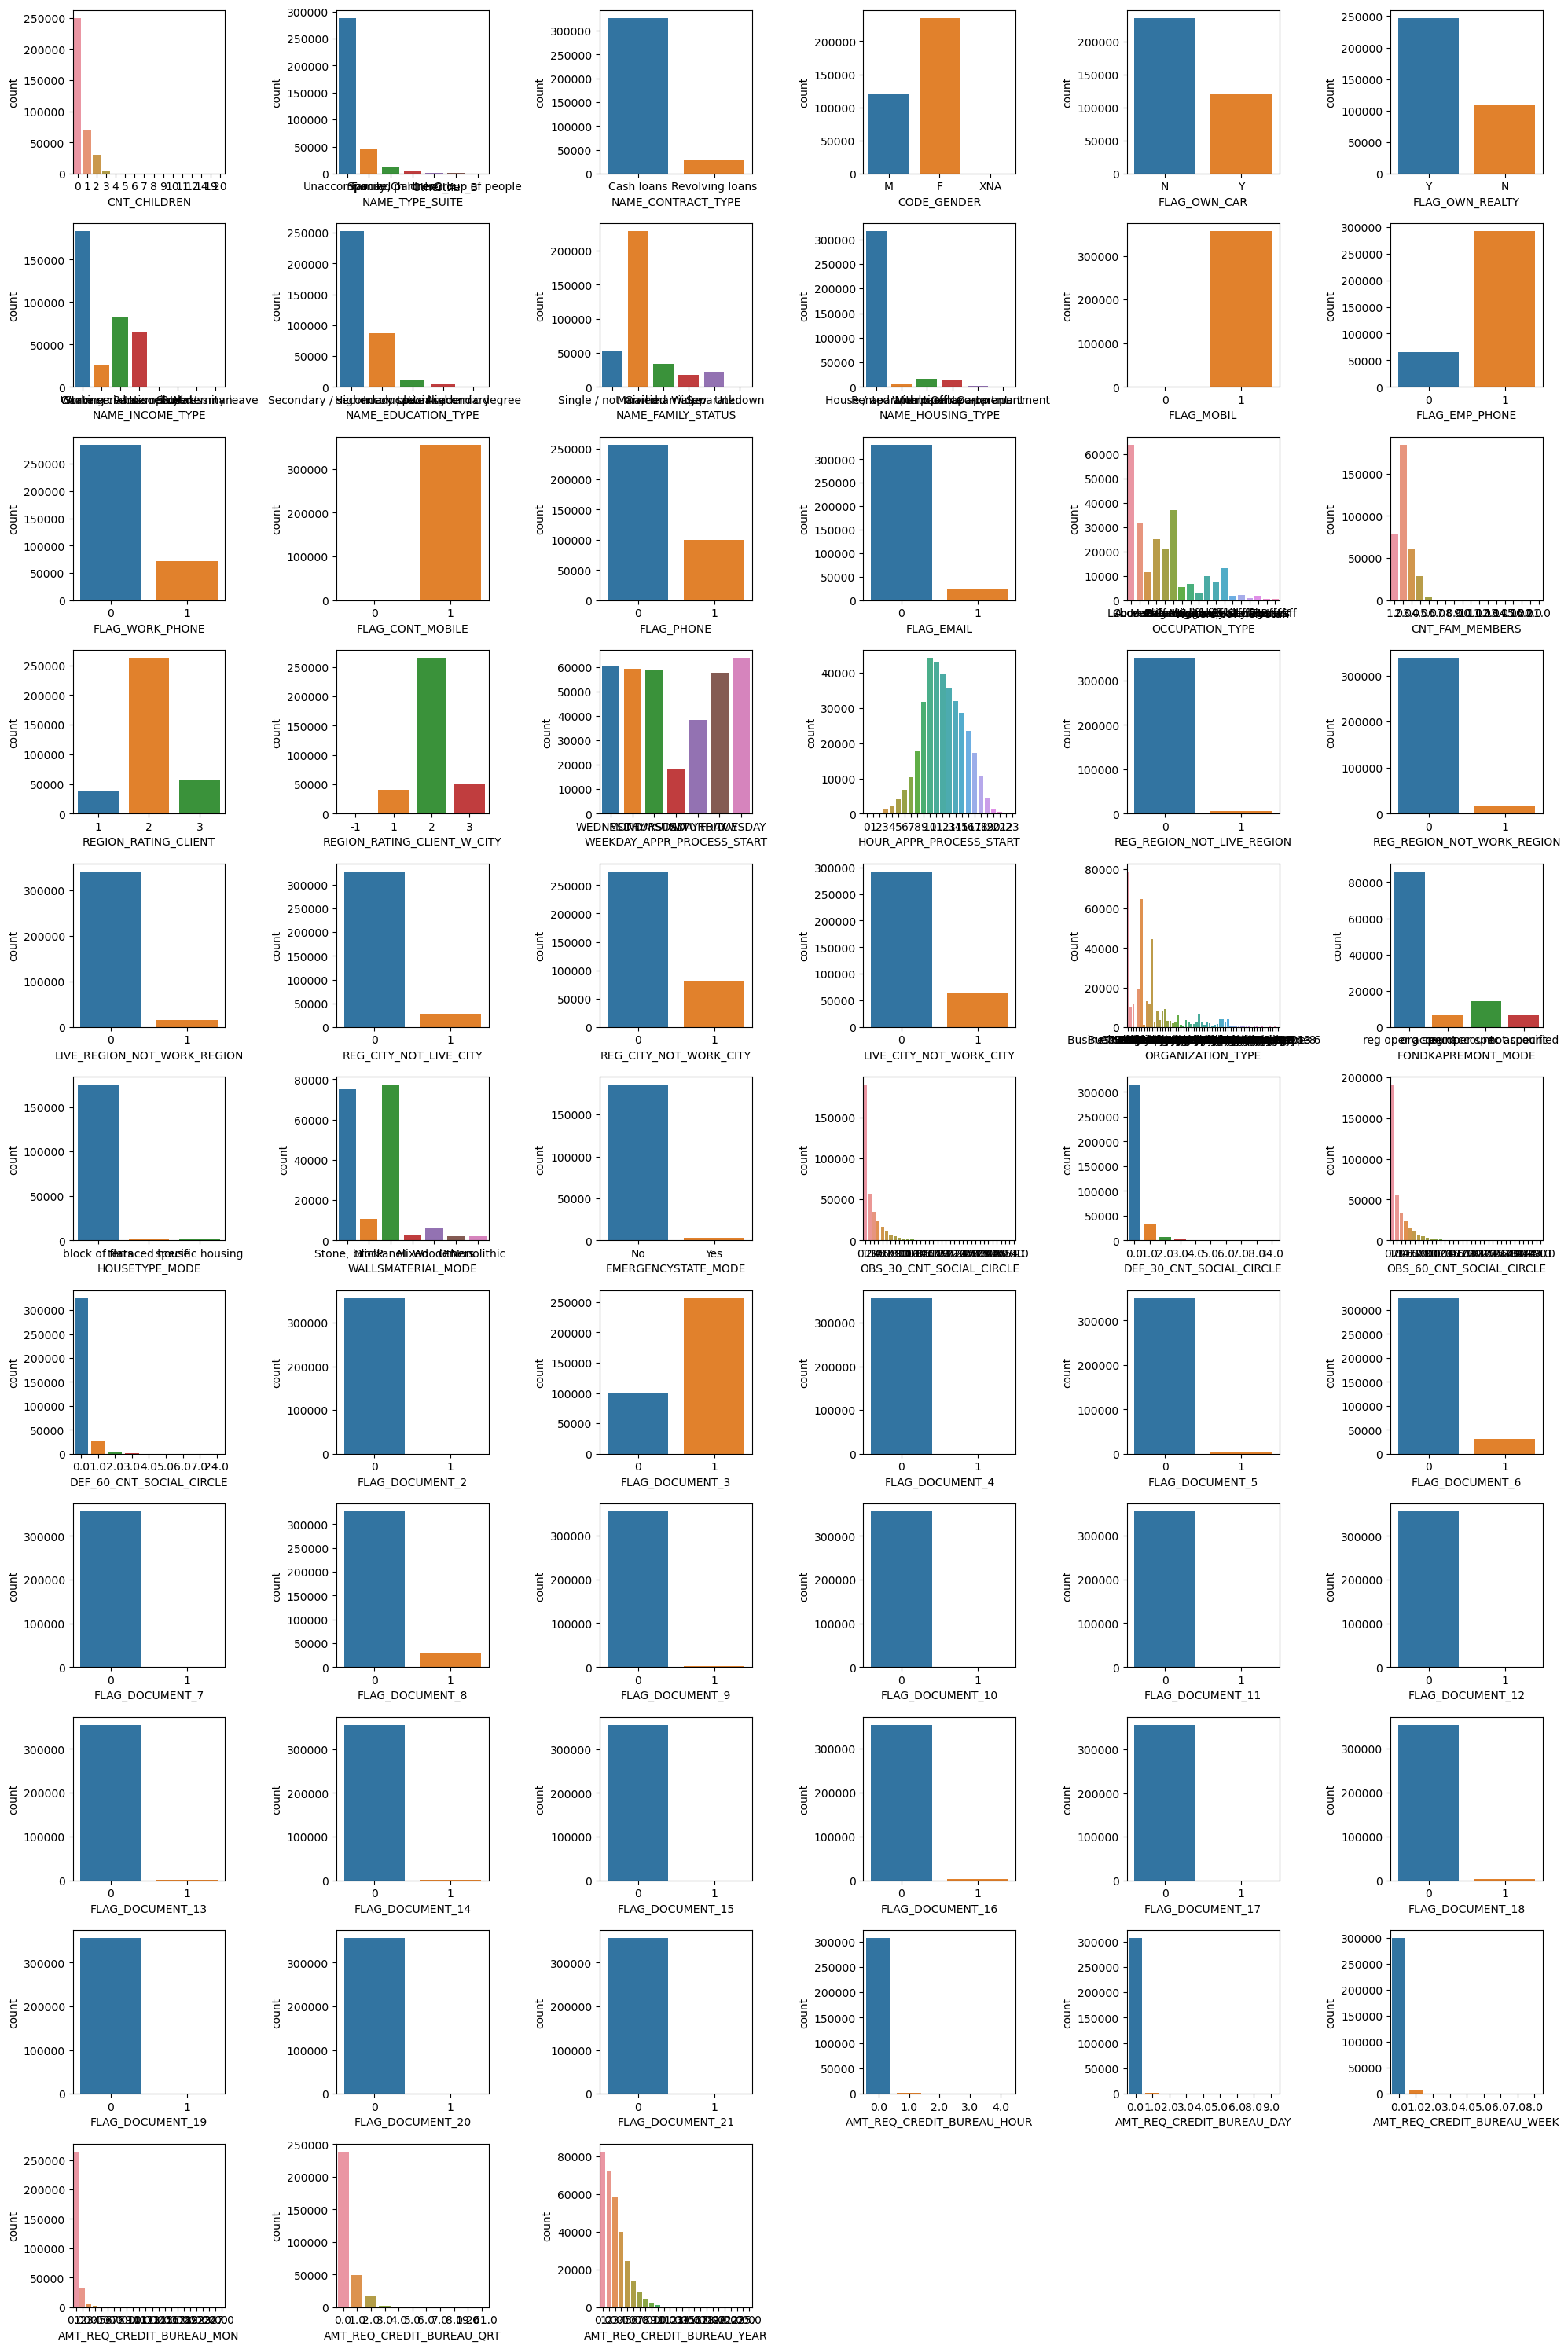

In [60]:
t = 1
plt.figure(figsize=(20,30))
for i in cat_col.columns:
    plt.subplot(11,6,t)
    sns.countplot(data = data,x = data[i])
    plt.xlabel(i)
    t = t+1
plt.tight_layout()
plt.show()

# Missing value treatment

In [61]:
# for numerical columns we will use the median value to fill in the missing values.

In [62]:
for i in num_col.columns:
    
    # Impute missing values with the median
    median_value = num_col[i].median()
    num_col[i].fillna(median_value, inplace=True)


In [63]:
num_col.isnull().sum().sum()

0

In [64]:
# for categorical columns we will use the mode to fill in the missing values.

In [65]:
for i in cat_col.columns:
    
    mode_value = cat_col[i].mode().iloc[0]
    cat_col[i].fillna(mode_value, inplace=True)


In [66]:
cat_col.isnull().sum().sum()

0

In [67]:
data['REGION_POPULATION_RELATIVE'].describe().T

count    356255.000000
mean          0.020917
std           0.013915
min           0.000253
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

# Anomalies in data

In [68]:
np.round(num_col.describe().T , 1)

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,356255.0,170116.1,223506.8,25650.0,112500.0,153000.0,202500.0,117000000.0
AMT_CREDIT,356255.0,587767.4,398623.7,45000.0,270000.0,500211.0,797557.5,4050000.0
AMT_ANNUITY,356255.0,27425.3,14732.1,1615.5,16731.0,25078.5,34960.5,258025.5
AMT_GOODS_PRICE,356255.0,527959.1,365928.6,40500.0,234000.0,450000.0,675000.0,4050000.0
REGION_POPULATION_RELATIVE,356255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
DAYS_BIRTH,356255.0,-16041.2,4358.8,-25229.0,-19676.0,-15755.0,-12425.0,-7338.0
DAYS_EMPLOYED,356255.0,64317.2,141705.5,-17912.0,-2781.0,-1224.0,-290.0,365243.0
DAYS_REGISTRATION,356255.0,-4983.6,3527.0,-24672.0,-7477.0,-4502.0,-1995.0,0.0
DAYS_ID_PUBLISH,356255.0,-3002.1,1517.9,-7197.0,-4318.0,-3252.0,-1717.0,0.0
OWN_CAR_AGE,356255.0,10.0,7.1,0.0,9.0,9.0,9.0,91.0


In [69]:
(num_col['DAYS_BIRTH'] / -365).describe()

count    356255.000000
mean         43.948627
std          11.941929
min          20.104110
25%          34.041096
50%          43.164384
75%          53.906849
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [70]:
num_col['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:ylabel='Frequency'>

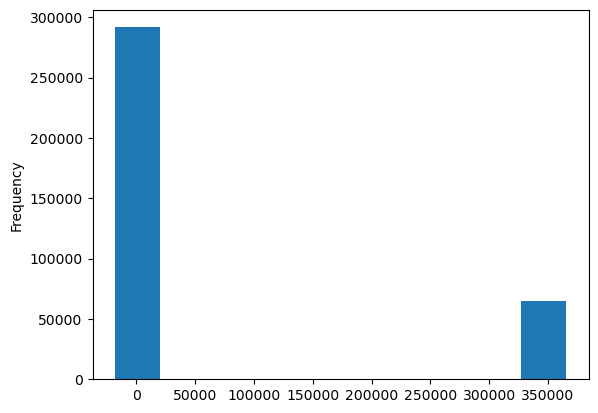

In [71]:
num_col['DAYS_EMPLOYED'].plot.hist()

In [72]:

# Replace the anomalous values with nan
num_col['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [73]:
num_col['DAYS_EMPLOYED'].isnull().sum()

64648

<AxesSubplot:ylabel='Frequency'>

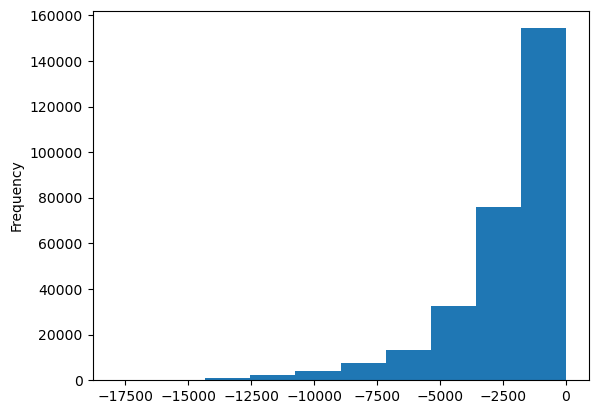

In [74]:
num_col['DAYS_EMPLOYED'].plot.hist()

In [75]:
# Now lets impite the null values with median

In [76]:
num_col['DAYS_EMPLOYED'].fillna(num_col['DAYS_EMPLOYED'].median() , inplace=True)

In [77]:
num_col['DAYS_EMPLOYED'].isnull().sum()

0

In [78]:
num_col['DAYS_BIRTH'] = np.abs(num_col['DAYS_BIRTH'])

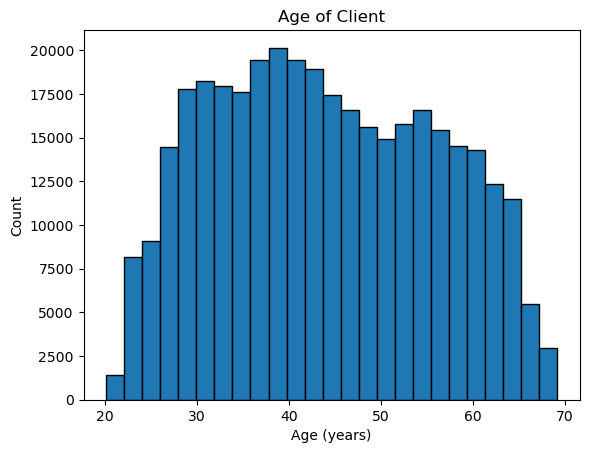

In [79]:
plt.hist(num_col['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

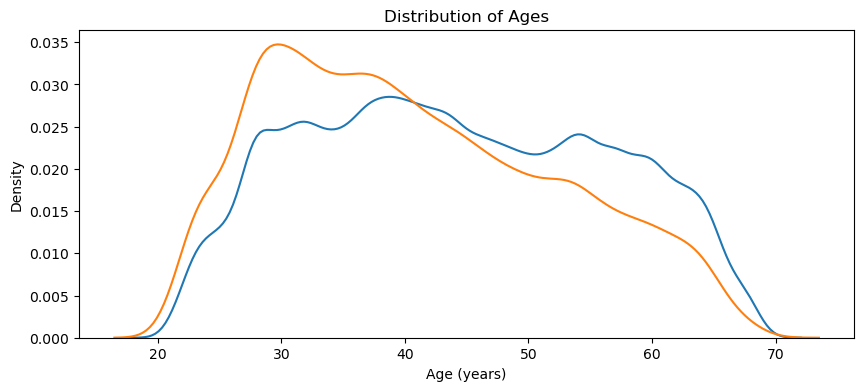

In [80]:
plt.figure(figsize = (10,4))

# KDE plot of loans that were repaid on time
sns.kdeplot(num_col.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(num_col.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [81]:
# Number of unique classes in each object column

In [82]:
cat_col.apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                   16
NAME_TYPE_SUITE                 7
NAME_CONTRACT_TYPE              2
CODE_GENDER                     3
FLAG_OWN_CAR                    2
FLAG_OWN_REALTY                 2
NAME_INCOME_TYPE                8
NAME_EDUCATION_TYPE             5
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
FLAG_WORK_PHONE                 2
FLAG_CONT_MOBILE                2
FLAG_PHONE                      2
FLAG_EMAIL                      2
OCCUPATION_TYPE                18
CNT_FAM_MEMBERS                18
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     4
WEEKDAY_APPR_PROCESS_START      7
HOUR_APPR_PROCESS_START        24
REG_REGION_NOT_LIVE_REGION      2
REG_REGION_NOT_WORK_REGION      2
LIVE_REGION_NOT_WORK_REGION     2
REG_CITY_NOT_LIVE_CITY          2
REG_CITY_NOT_WORK_CITY          2
LIVE_CITY_NOT_WORK_CITY         2
ORGANIZATION_TYPE              58
FONDKAPREMONT_

In [83]:
cat_col['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14, 20],
      dtype=int64)

In [84]:
cat_col['CNT_CHILDREN'][cat_col['CNT_CHILDREN'] >6]

3079       7
12615      8
23881      9
26195      7
34545     11
80948     12
116428     7
132585    10
154317     8
155369    19
171125    12
176011    14
183878    14
186820    10
190547     7
220134     7
233611     7
265784    19
267998    14
276768     9
305112     7
307763     8
324455     7
325150    20
329382    11
348566     8
350220    11
354924     8
Name: CNT_CHILDREN, dtype: int64

In [85]:
cat_col['CNT_CHILDREN'].value_counts()

0     250056
1      70623
2      30698
3       4252
4        478
5         96
6         24
7          8
8          5
11         3
14         3
9          2
12         2
10         2
19         2
20         1
Name: CNT_CHILDREN, dtype: int64

In [86]:
# This seems like an anomaly in data, having kids  more than 6, lets group the entire data above 5 as 6.

In [87]:

# Assuming df is your DataFrame and 'column_name' is the column to be modified
cat_col['CNT_CHILDREN'] = cat_col['CNT_CHILDREN'].apply(lambda x: 6 if x > 6 else x)


In [88]:
cat_col['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [89]:
cat_col['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      290456
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

In [90]:
cat_col['NAME_TYPE_SUITE']=cat_col['NAME_TYPE_SUITE'].apply(lambda x: 'others' if x in ['Other_B','Other_A','Group of people'] else x)

In [91]:
cat_col['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      290456
Family              46030
Spouse, partner     12818
Children             3675
others               3276
Name: NAME_TYPE_SUITE, dtype: int64

In [92]:
cat_col['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [93]:
cat_col['NAME_INCOME_TYPE'].value_counts()

Working                 183307
Commercial associate     83019
Pensioner                64635
State servant            25235
Unemployed                  23
Student                     20
Businessman                 11
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [94]:
cat_col['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [95]:
cat_col['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    252379
Higher education                  87379
Incomplete higher                 12001
Lower secondary                    4291
Academic degree                     205
Name: NAME_EDUCATION_TYPE, dtype: int64

In [96]:
cat_col['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [97]:
cat_col['OCCUPATION_TYPE'].value_counts()

Laborers                 175837
Sales staff               37174
Core staff                31931
Managers                  24945
Drivers                   21376
High skill tech staff     13234
Accountants               11441
Medicine staff             9853
Security staff             7636
Cooking staff              6840
Cleaning staff             5309
Private service staff      3107
Low-skill Laborers         2365
Waiters/barmen staff       1526
Secretaries                1518
Realty agents               889
HR staff                    667
IT staff                    607
Name: OCCUPATION_TYPE, dtype: int64

In [98]:
cat_col['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., 14., 12.,
       20., 15., 16., 11., 21.])

In [99]:
cat_col['CNT_FAM_MEMBERS'].value_counts()

2.0     184413
1.0      78098
3.0      60774
4.0      28387
5.0       3990
6.0        451
7.0         93
8.0         22
9.0          7
10.0         6
13.0         3
14.0         2
12.0         2
20.0         2
16.0         2
15.0         1
11.0         1
21.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [100]:
cat_col['CNT_FAM_MEMBERS'] = cat_col['CNT_FAM_MEMBERS'].apply(lambda x: 6 if x>6 else x)

In [101]:
cat_col['CNT_FAM_MEMBERS'].value_counts()

2.0    184413
1.0     78098
3.0     60774
4.0     28387
5.0      3990
6.0       593
Name: CNT_FAM_MEMBERS, dtype: int64

In [102]:
cat_col['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [103]:
cat_col['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      63652
WEDNESDAY    60391
MONDAY       59120
THURSDAY     59009
FRIDAY       57588
SATURDAY     38455
SUNDAY       18040
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [104]:
cat_col['HOUR_APPR_PROCESS_START'].unique()

array([10, 11,  9, 17, 16, 14,  8, 15,  7, 13,  6, 12, 19,  3, 18, 21,  4,
        5, 20, 22,  1,  2, 23,  0], dtype=int64)

In [105]:
cat_col['HOUR_APPR_PROCESS_START'].value_counts()

10    44196
11    43163
12    39651
13    35674
14    31879
9     31725
15    28600
16    23491
8     17701
17    17256
18    10492
7     10437
6      6855
19     4477
5      4192
4      2392
3      1470
20     1410
21      474
2       344
22      175
1       105
23       48
0        48
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [106]:
cat_col['HOUR_APPR_PROCESS_START'] = cat_col['HOUR_APPR_PROCESS_START'].apply(
    lambda x:'Working hours' if x in [9,10,11,12,13,14,15,16,17,18] else 'Non-working hours')

In [107]:
cat_col['HOUR_APPR_PROCESS_START'].value_counts()

Working hours        306127
Non-working hours     50128
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [108]:
cat_col['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [109]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Industry' if x in ['Industry: type 11',
            'Industry: type 1', 'Industry: type 3','Industry: type 4','Industry: type 7','Industry: type 9',
            'Industry: type 2','Industry: type 12','Industry: type 5','Industry: type 10','Industry: type 13',
            'Industry: type 8','Industry: type 6'] else x )

In [110]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Business Entity' if x in 
            ['Business Entity Type 3','Business Entity Type 2','Business Entity Type 1'] else x )

In [111]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Trade' if x in 
            ['Trade: type 7','Trade: type 3','Trade: type 2','Trade: type 6','Trade: type 1',
             'Trade: type 4','Trade: type 5'] else x)

In [112]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Transport' if x in 
            ['Transport: type 4','Transport: type 2','Transport: type 3','Transport: type 1'] else x)

In [113]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Government' if x in 
            ['Military','Police','Postal','Security Ministries'] else x)

In [114]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Hospitality Services' if x in 
                        ['Hotel','Restaurant','Cleaning','Culture','Services'] else x)
                                                                  

In [115]:
cat_col['ORGANIZATION_TYPE'] = cat_col['ORGANIZATION_TYPE'].apply(lambda x: 'Education Institute' if x in
                ['School','Kindergarten','University'] else x)

In [116]:
cat_col['ORGANIZATION_TYPE'].value_counts()

Business Entity         97735
XNA                     64648
Self-employed           44332
Government              22624
Education Institute     19646
Other                   19390
Trade                   16647
Industry                16588
Medicine                12909
Transport               10531
Construction             7760
Hospitality Services     5815
Security                 3719
Housing                  3393
Bank                     2881
Agriculture              2746
Electricity              1106
Insurance                 677
Telecom                   672
Emergency                 651
Advertising               500
Realtor                   468
Mobile                    362
Legal Services            358
Religion                   97
Name: ORGANIZATION_TYPE, dtype: int64

In [117]:
cat_col['WALLSMATERIAL_MODE'].unique()

array(['Stone, brick', 'Block', 'Panel', 'Mixed', 'Wooden', 'Others',
       'Monolithic'], dtype=object)

In [118]:
cat_col['WALLSMATERIAL_MODE'].value_counts()

Panel           257543
Stone, brick     75249
Block            10681
Wooden            6156
Mixed             2649
Monolithic        2068
Others            1909
Name: WALLSMATERIAL_MODE, dtype: int64

In [119]:
cat_col['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,   7.,   3.,   6.,   5.,  12.,
         9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,  19.,
        18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,  30.,
       353., 354., 352.])

In [120]:
cat_col['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      190985
1.0       56548
2.0       34559
3.0       23591
4.0       16345
5.0       11020
6.0        7487
7.0        5085
8.0        3453
9.0        2347
10.0       1595
11.0        987
12.0        759
13.0        475
14.0        307
15.0        196
16.0        153
17.0        104
18.0         56
19.0         52
20.0         39
21.0         31
22.0         23
23.0         18
25.0         11
24.0         11
27.0          5
26.0          3
29.0          2
30.0          2
28.0          1
47.0          1
348.0         1
353.0         1
354.0         1
352.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [121]:
cat_col['OBS_30_CNT_SOCIAL_CIRCLE'] = cat_col['OBS_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: 10 if x > 10 else x)

In [122]:
cat_col['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     190985
1.0      56548
2.0      34559
3.0      23591
4.0      16345
5.0      11020
6.0       7487
7.0       5085
10.0      4835
8.0       3453
9.0       2347
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [123]:
cat_col['DEF_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1.,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [124]:
cat_col['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     315569
1.0      32771
2.0       6157
3.0       1381
4.0        293
5.0         64
6.0         14
34.0         4
7.0          1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [125]:
cat_col['DEF_30_CNT_SOCIAL_CIRCLE'] = cat_col['DEF_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: 5 if x > 4 else x)

In [126]:
cat_col['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    315569
1.0     32771
2.0      6157
3.0      1381
4.0       293
5.0        84
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [127]:
cat_col['OBS_60_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,   7.,   3.,   6.,   5.,  12.,
         9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,  17.,
        19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,  26.,
       349., 351.])

In [128]:
cat_col['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      191856
1.0       56611
2.0       34501
3.0       23477
4.0       16145
5.0       10904
6.0        7379
7.0        5021
8.0        3376
9.0        2293
10.0       1551
11.0        968
12.0        726
13.0        468
14.0        283
15.0        198
16.0        154
17.0         89
18.0         61
19.0         50
20.0         38
21.0         30
22.0         21
23.0         16
24.0         12
25.0         11
27.0          5
29.0          3
349.0         2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
351.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [129]:
cat_col['OBS_60_CNT_SOCIAL_CIRCLE'] = cat_col['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: 10 if x > 10 else x)

In [130]:
cat_col['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     191856
1.0      56611
2.0      34501
3.0      23477
4.0      16145
5.0      10904
6.0       7379
7.0       5021
10.0      4692
8.0       3376
9.0       2293
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [131]:
cat_col['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1.,  3.,  5.,  4.,  7., 24.,  6.])

In [132]:
cat_col['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     326385
1.0      25325
2.0       3666
3.0        695
4.0        152
5.0         24
24.0         4
6.0          3
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [133]:
cat_col['DEF_60_CNT_SOCIAL_CIRCLE'] = cat_col['DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: 5 if x > 4 else x)

In [134]:
cat_col['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    326385
1.0     25325
2.0      3666
3.0       695
4.0       152
5.0        32
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [135]:
cat_col['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([0., 1., 2., 3., 4.])

In [136]:
cat_col['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    354540
1.0      1648
2.0        57
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [137]:
cat_col['AMT_REQ_CREDIT_BUREAU_HOUR'] = cat_col['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: 1 if x >1 else x)

In [138]:
cat_col['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    354540
1.0      1715
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [139]:
cat_col['AMT_REQ_CREDIT_BUREAU_DAY'].unique()

array([0., 1., 3., 2., 4., 5., 6., 9., 8.])

In [140]:
cat_col['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    354696
1.0      1355
2.0       113
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [141]:
cat_col['AMT_REQ_CREDIT_BUREAU_DAY'] = cat_col['AMT_REQ_CREDIT_BUREAU_DAY'].apply(lambda x: 2 if x >1 else x)

In [142]:
cat_col['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    354696
1.0      1355
2.0       204
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [143]:
cat_col['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([0., 1., 3., 2., 4., 5., 6., 8., 7.])

In [144]:
cat_col['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    347603
1.0      8321
2.0       202
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [145]:
cat_col['AMT_REQ_CREDIT_BUREAU_WEEK'] = cat_col['AMT_REQ_CREDIT_BUREAU_WEEK'].apply(lambda x: 3 if x >2 else x)

In [146]:
cat_col['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    347603
1.0      8321
2.0       202
3.0       129
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [147]:
cat_col['AMT_REQ_CREDIT_BUREAU_MON'].unique()

array([ 0.,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16., 12.,
       14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [148]:
cat_col['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     312142
1.0      33471
2.0       5409
3.0       1995
4.0       1077
5.0        603
6.0        344
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [149]:
cat_col['AMT_REQ_CREDIT_BUREAU_MON'] = cat_col['AMT_REQ_CREDIT_BUREAU_MON'].apply(lambda x: 5 if x >4 else x)

In [150]:
cat_col['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0    312142
1.0     33471
2.0      5409
5.0      2161
3.0      1995
4.0      1077
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [151]:
cat_col['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array([  0.,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,  19.])

In [152]:
cat_col['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      286544
1.0       49435
2.0       17410
3.0        2212
4.0         533
5.0          75
6.0          29
7.0           8
8.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [153]:
cat_col['AMT_REQ_CREDIT_BUREAU_QRT'] = cat_col['AMT_REQ_CREDIT_BUREAU_QRT'].apply(lambda x: 5 if x >4 else x)

In [154]:
cat_col['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0    286544
1.0     49435
2.0     17410
3.0      2212
4.0       533
5.0       121
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [155]:
cat_col['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0.,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11., 13.,
       16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [156]:
cat_col['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     130208
1.0      72616
2.0      58681
3.0      39822
4.0      24459
5.0      14128
6.0       8094
7.0       4422
8.0       2424
9.0       1218
10.0        43
11.0        43
12.0        35
13.0        21
14.0        11
17.0         8
15.0         6
19.0         4
18.0         4
16.0         3
25.0         1
23.0         1
22.0         1
21.0         1
20.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [157]:
cat_col['AMT_REQ_CREDIT_BUREAU_YEAR'] = cat_col['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(lambda x: 10 if x >9 else x)

In [158]:
cat_col['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     130208
1.0      72616
2.0      58681
3.0      39822
4.0      24459
5.0      14128
6.0       8094
7.0       4422
8.0       2424
9.0       1218
10.0       183
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [159]:
cat_col.shape , num_col.shape  , data.shape

((356255, 63), (356255, 57), (356255, 122))

## Label encoding for cat columns

In [160]:
le = LabelEncoder()

for i in cat_col.columns:
    cat_col[i] = le.fit_transform(cat_col[i])

In [161]:
df = pd.concat([num_col , cat_col, data['TARGET']] , axis =1)

In [162]:
df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,-2120,9.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0,0.0198,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,-1134.0,0,3,0,1,0,1,7,4,3,1,1,1,0,1,1,0,8,0,1,2,6,1,0,0,0,0,0,0,3,2,0,5,0,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,-291,9.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0,0.0554,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,-828.0,0,1,0,0,0,0,4,1,1,1,1,1,0,1,1,0,3,1,0,1,1,1,0,0,0,0,0,0,5,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,-2531,26.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,-815.0,0,3,1,1,1,1,7,4,3,1,1,1,1,1,1,0,8,0,1,2,1,1,0,0,0,0,0,0,8,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,-2437,9.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.

# Statistical test

In [163]:
# lets check the chi-sqaure test on categorical columns

# null hypothesis = there is no relation between columns
# alternate hypothesis = there is a relation

# Assuming alpha as 0.05

In [164]:
insignificant_features = []

for i in cat_col.columns:
    table = pd.crosstab(df['TARGET'],df[i])
    ch1,p_value,dof,e = stats.chi2_contingency(table)
    print(i)
    print('there is a relation', p_value<0.05 ,p_value)
    
    if p_value>.05 :
        insignificant_features.append(i)

CNT_CHILDREN
there is a relation True 2.135381009734265e-29
NAME_TYPE_SUITE
there is a relation True 3.446825818703331e-06
NAME_CONTRACT_TYPE
there is a relation True 1.0235150721172847e-65
CODE_GENDER
there is a relation True 1.1290217848908289e-200
FLAG_OWN_CAR
there is a relation True 9.330994431109667e-34
FLAG_OWN_REALTY
there is a relation True 0.0006681470317545887
NAME_INCOME_TYPE
there is a relation True 1.9281456056858933e-266
NAME_EDUCATION_TYPE
there is a relation True 2.4476812052198174e-219
NAME_FAMILY_STATUS
there is a relation True 7.744841561414258e-107
NAME_HOUSING_TYPE
there is a relation True 1.0990890032617707e-88
FLAG_MOBIL
there is a relation False 1.0
FLAG_EMP_PHONE
there is a relation True 2.530605927961308e-143
FLAG_WORK_PHONE
there is a relation True 2.6758000919452704e-56
FLAG_CONT_MOBILE
there is a relation False 0.8976989816319643
FLAG_PHONE
there is a relation True 9.489418049556951e-40
FLAG_EMAIL
there is a relation False 0.3366632895181666
OCCUPATION_TYP

In [165]:
insignificant_features

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

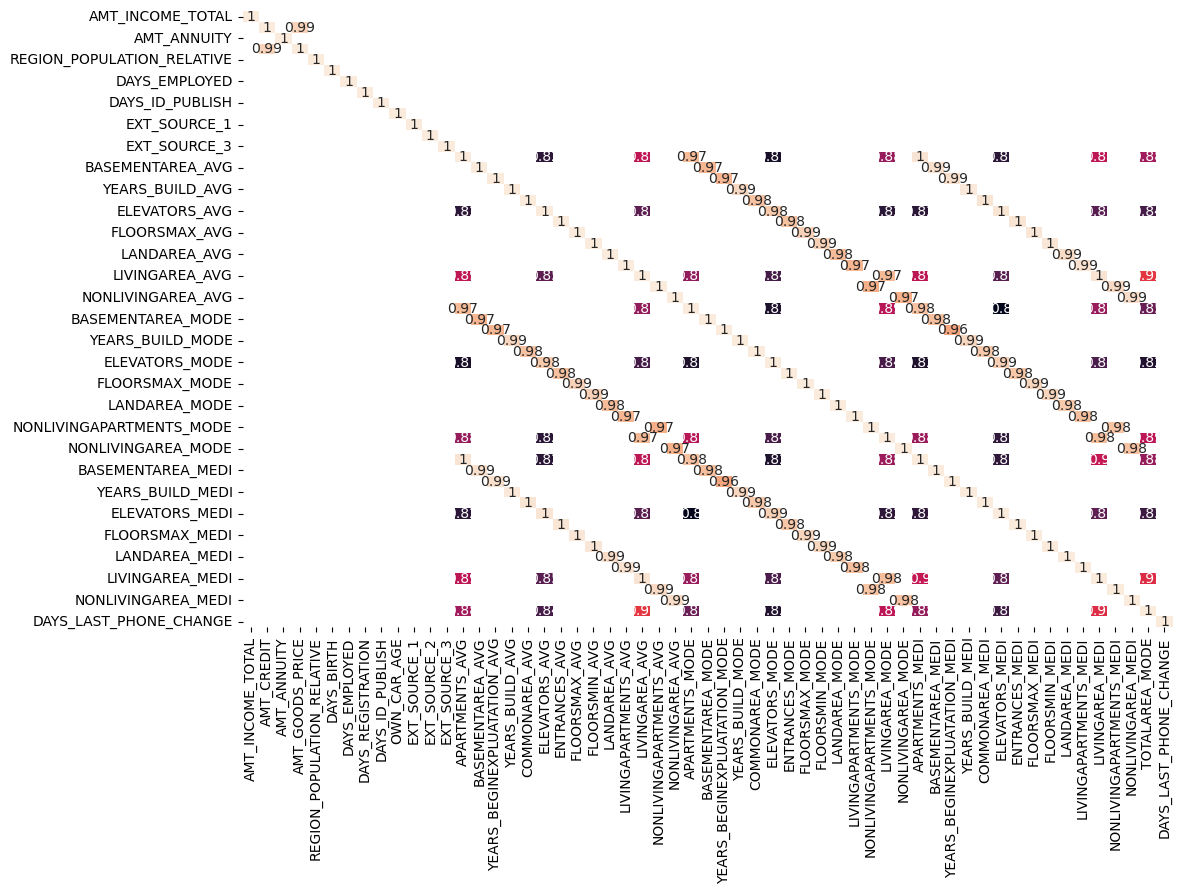

In [166]:
plt.figure(figsize = (12,8))
sns.heatmap(num_col.corr()[(num_col.corr()>.80) | (num_col.corr()< -.80)    ] , annot=True , cbar=False)
plt.show() 

In [167]:
df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,-2120,9.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0,0.0198,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,-1134.0,0,3,0,1,0,1,7,4,3,1,1,1,0,1,1,0,8,0,1,2,6,1,0,0,0,0,0,0,3,2,0,5,0,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,-291,9.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0,0.0554,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,-828.0,0,1,0,0,0,0,4,1,1,1,1,1,0,1,1,0,3,1,0,1,1,1,0,0,0,0,0,0,5,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,-2531,26.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,-815.0,0,3,1,1,1,1,7,4,3,1,1,1,1,1,1,0,8,0,1,2,1,1,0,0,0,0,0,0,8,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,-2437,9.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.

In [168]:
df['TARGET'][df['TARGET'].isna()]

307511   NaN
307512   NaN
307513   NaN
307514   NaN
307515   NaN
          ..
356250   NaN
356251   NaN
356252   NaN
356253   NaN
356254   NaN
Name: TARGET, Length: 48744, dtype: float64

In [169]:
# 307511  

In [170]:
train_data = df.iloc[0:307511]

In [171]:
test_data = df.iloc[307511:]

In [172]:
train_data.shape , test_data.shape

((307511, 121), (48744, 121))

In [173]:
train_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,-2120,9.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0,0.0198,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,-1134.0,0,3,0,1,0,1,7,4,3,1,1,1,0,1,1,0,8,0,1,2,6,1,0,0,0,0,0,0,3,2,0,5,0,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,-291,9.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0,0.0554,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,-828.0,0,1,0,0,0,0,4,1,1,1,1,1,0,1,1,0,3,1,0,1,1,1,0,0,0,0,0,0,5,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,-2531,26.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,-815.0,0,3,1,1,1,1,7,4,3,1,1,1,1,1,1,0,8,0,1,2,1,1,0,0,0,0,0,0,8,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,-2437,9.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.

In [174]:
test_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
307511,135000.0,568800.0,20560.5,450000.0,0.018850,19241,-2329.0,-5170.0,-812,9.0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,0.7552,0.0213,0.00,0.1379,0.1250,0.2083,0.0482,0.0756,0.0505,0.0000,0.0036,0.0672,0.0612,0.9732,0.7648,0.0192,0.0000,0.1379,0.1250,0.2083,0.0459,0.0771,0.0000,0.0526,0.0011,0.0666,0.0590,0.9732,0.7585,0.0210,0.00,0.1379,0.1250,0.2083,0.0487,0.0770,0.0514,0.0000,0.0031,0.0392,-1740.0,0,3,0,0,0,1,7,1,1,1,1,1,0,1,0,1,8,1,1,2,5,1,0,0,0,0,0,0,5,2,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
307512,99000.0,222768.0,17370.0,180000.0,0.035792,18064,-4469.0,-9118.0,-1623,9.0,0.564990,0.291656,0.432962,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0000,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,0.0,0,3,0,1,0,1,7,4,1,1,1,1,0,1,0,0,9,1,1,2,0,1,0,0,0,0,0,0,20,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN
307513,202500.0,663264.0,69777.0,630000.0,0.019101,20038,-4458.0,-2175.0,-3503,5.0,0.506155,0.699787,0.610991,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0000,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,-856.0,0,3,0,1,1,1,7,1,1,1,1,1,0,1,0,0,4,1,1,2,1,1,0,0,0,0,0,0,23,2,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,NaN
307514,315000.0,1575000.0,49018.5,1575000.0,0.026392,13976,-1866.0,-2000.0,-4208,9.0,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042

# Let's apply the Base Model

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X = train_data.drop('TARGET' , axis =1)

In [177]:
y = train_data['TARGET']

In [178]:
xtrain, xtest , ytrain, ytest =   train_test_split(X,y, random_state=2, test_size=.2)

In [179]:
xtrain.shape, xtest.shape , ytrain.shape, ytest.shape

((246008, 120), (61503, 120), (246008,), (61503,))

In [180]:
ytrain.value_counts(normalize=True)

0.0    0.919222
1.0    0.080778
Name: TARGET, dtype: float64

In [181]:
ytrain

22973     0.0
229678    0.0
1237      0.0
240062    0.0
33320     0.0
         ... 
33867     0.0
84434     0.0
95816     0.0
203245    1.0
100879    0.0
Name: TARGET, Length: 246008, dtype: float64

In [182]:
# Logistic Regression as per stats model

In [183]:
import statsmodels.api as sma

In [184]:
xtrain_c = sma.add_constant(xtrain)
xtest_c = sma.add_constant(xtest)

In [185]:
model = sma.Logit(ytrain,xtrain_c).fit()

         Current function value: 0.249759
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               246008
Model:                          Logit   Df Residuals:                   245887
Method:                           MLE   Df Model:                          120
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.1101
Time:                        17:46:59   Log-Likelihood:                -61443.
converged:                      False   LL-Null:                       -69046.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -12.5809   2765.162     -0.005      0.996   -5432.198    5407.036
AMT_INCOME_TOTAL              2.014e-08   2.42e-08      0.831      0.406   -2.74e-08    6.77e-08
AMT_CREDIT                    2.367e-06   1.26e-07     18.784      0.000    2.12e-06    2.61e-06
AMT_ANNUITY                   9.579e-06   9.31e-07     10.290      0.000    7.75e-06    1.14e-05
AMT_GOODS_PRICE              -2.883e-06   1.44e-07    -20.074      0.000   -3.16e-06    -2.6e-06
REGION_POPULATION_RELATIVE       1.1825      0.737      1.605      0.108      -0.261       2.626
DAYS_BIRTH                    6.947e-06   2.72e-06      2.550      0.011    1.61e-06    1.23e-05
DAYS_EMPLOYED                 7.869e-05   4.74e-06     16.598      0.000    6.94e-05     8.8e-05
DAYS_REGISTRATION             9.828e-06   2.48e-06      3.967      0.000    4.97e-06    1.47e-05
DAYS_ID_PUBLISH               4.267e-05   5.46e-06      7.811      0.000     3.2e-05    5.34e-05
OWN_CAR_AGE                      0.0036      0.001      3.253      0.001       0.001       0.006
EXT_SOURCE_1                    -1.1530      0.060    -19.082      0.000      -1.271      -1.035
EXT_SOURCE_2                    -2.0808      0.040    -52.174      0.000      -2.159      -2.003
EXT_SOURCE_3                    -2.6583      0.043    -61.626      0.000      -2.743      -2.574
APARTMENTS_AVG                   1.5329      1.500      1.022      0.307      -1.406       4.472
BASEMENTAREA_AVG                -5.5850      3.034     -1.841      0.066     -11.531       0.361
YEARS_BEGINEXPLUATATION_AVG      1.5385      1.674      0.919      0.358      -1.742       4.819
YEARS_BUILD_AVG                  3.8492      2.726      1.412      0.158      -1.494       9.192
COMMONAREA_AVG                   2.7305      2.323      1.175      0.240      -1.822       7.283
ELEVATORS_AVG                   -0.4754      1.608     -0.296      0.768      -3.627       2.677
ENTRANCES_AVG                    2.2717      1.897      1.198      0.231      -1.446       5.989
FLOORSMAX_AVG                   -0.2750      1.394     -0.197      0.844      -3.007       2.457
FLOORSMIN_AVG                   -0.2752      1.596     -0.172      0.863      -3.404       2.853
LANDAREA_AVG                     1.2317      0.825      1.494      0.135      -0.385       2.848
LIVINGAPARTMENTS_AVG            -3.2262      2.887     -1.118      0.264      -8.884       2.432
LIVINGAREA_AVG                   0.7812      1.316      0.594      0.553      -1.797       3.360
NONLIVINGAPARTMENTS_AVG         -1.4878      4.932     -0.302      0.763     -11.155       8.179
NONLIVINGAREA_AVG                1.0948      1.302      0.841      0.401      -1.458       3.647
APARTMENTS_MODE                 -0.6021      0.993     -0.607      0.544      -2.547       1.343
BASEMENTAREA_MODE                0.1464      1.084      0.135      0.893      -1.978       2.271
YEARS_BEGINEXPLUATATION_MODE    -0.4206 

# Features selection

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
log_reg_base = LogisticRegression()

In [189]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [190]:
sfs = SequentialFeatureSelector(estimator=log_reg_base ,scoring='accuracy' ,k_features='best', verbose= 1 )

In [191]:
# sfs.fit(xtrain,ytrain)

# Balancing the dataset and reducing the rows

In [192]:
# Let's recude the samaple size using under sampling technique

In [193]:
from imblearn.under_sampling import RandomUnderSampler

In [194]:
# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the training features and target variable into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Resample the majority class using random under-sampling
undersampler = RandomUnderSampler(sampling_strategy=0.32, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)



In [195]:
y_resampled.value_counts(normalize=True)

0.0    0.757575
1.0    0.242425
Name: TARGET, dtype: float64

In [196]:
X_resampled.shape, y_resampled.shape

((102403, 120), (102403,))

In [197]:
# Let's work on the resampled data now

## Lets's remove the features which are insignificant after applying Chi square test

In [198]:
insignificant_features

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [199]:
X_new = X_resampled.drop(insignificant_features, axis =1 , )

In [200]:
X_new.shape

(102403, 104)

In [201]:
X_new.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201622,292500.0,1102500.0,32364.0,1102500.0,0.018209,11763,-688.0,-500.0,-3325,9.0,0.506155,0.616187,0.651260,0.2938,0.1995,0.9891,0.7552,0.0213,0.280,0.2414,0.3750,0.2083,0.1346,0.0756,0.0645,0.0000,0.0028,0.2994,0.2070,0.9891,0.7648,0.0192,0.2820,0.2414,0.3750,0.2083,0.1377,0.0771,0.0000,0.0672,0.0030,0.2967,0.1995,0.9891,0.7585,0.0210,0.28,0.2414,0.3750,0.2083,0.1370,0.0770,0.0656,0.0000,0.0029,0.2379,0.0,1,1,0,1,1,1,7,4,1,1,1,0,1,4,2,2,3,4,1,0,0,0,0,0,23,2,0,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8728,270000.0,720000.0,36000.0,720000.0,0.046220,23199,-1663.0,-4264.0,-4151,9.0,0.506155,0.728499,0.638044,0.0763,0.0603,0.9776,0.6940,0.0306,0.016,0.1207,0.1875,0.2292,0.0598,0.0622,0.0681,0.0000,0.0000,0.0840,0.0487,0.9752,0.6733,0.0210,0.0000,0.1379,0.1667,0.2083,0.0431,0.0735,0.0000,0.0534,0.0000,0.0833,0.0656,0.9757,0.6713,0.0288,0.00,0.1379,0.1667,0.2083,0.0598,0.0684,0.0716,0.0000,0.0000,0.0541,-135.0,0,3,1,0,0,1,3,2,1,1,0,0,0,8,1,0,1,0,1,0,0,0,0,0,24,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
152555,135000.0,360000.0,18000.0,360000.0,0.010966,19165,-3432.0,-4524.0,-2558,7.0,0.805582,0.667953,0.108226,0.2361,0.1748,0.9921,0.8912,0.0661,0.240,0.2069,0.3750,0.4167,0.1006,0.1908,0.2609,0.0077,0.0186,0.2405,0.1814,0.9921,0.8955,0.0667,0.2417,0.2069,0.3750,0.4167,0.1029,0.2084,0.0078,0.2718,0.0196,0.2384,0.1748,0.9921,0.8927,0.0665,0.24,0.2069,0.3750,0.4167,0.1023,0.1941,0.2656,0.0078,0.0189,0.2454,-1585.0,1,3,1,0,1,1,7,1,5,1,1,0,0,10,1,1,2,3,1,0,0,0,0,0,3,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218562,90000.0,225000.0,10426.5,225000.0,0.015221,10416,-1154.0,-4766.0,-3037,7.0,0.566146,0.295033,0.194068,0.0880,0.0765,0.9816,0.7552,0.0213,0.000,0.1379,0.1667,0.2083,0.0482,0.0756,0.0749,0.0000,0.0036,0.0840,0.0749,0.9816,0.7648,0.0192,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0000,0.0733,0.0011,0.0874,0.0761,0.9816,0.7585,0.0210,0.00,0.1379,0.1667,0.2083,0.0487,0.0770,0.0754,0.0000,0.0031,0.0690,-349.0,0,3,0,0,1,0,1,4,3,5,1,0,1,14,0,1,2,5,1,0,0,0,1,1,20,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6
299619,283500.0,1800000.0,51718.5,1800000.0,0.003541,12125,-3256.0,-1913.0,-4

# Capping

In [272]:
X_new_wo,y_resampled_wo   = X_new,y_resampled 

In [ ]:

q3=df.Price.quantile(0.75)
q1=df.Price.quantile(0.25)

iqr=q3-q1

upper=q3+5*iqr
upper

# Lets apply the base model

In [202]:
xtrain, xtest , ytrain, ytest =   train_test_split(X_new,y_resampled, random_state=2, test_size=.2)

In [203]:
xtrain.shape, xtest.shape , ytrain.shape, ytest.shape

((81922, 104), (20481, 104), (81922,), (20481,))

In [204]:
xtrain_c = sma.add_constant(xtrain)
xtest_c = sma.add_constant(xtest)

In [205]:
model_logit = sma.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.482875
         Iterations 8


In [206]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                81922
Model:                          Logit   Df Residuals:                    81817
Method:                           MLE   Df Model:                          104
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.1301
Time:                        17:47:15   Log-Likelihood:                -39558.
converged:                       True   LL-Null:                       -45477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.2222      0.286      4.266      0.000       0.661       1.784
AMT_INCOME_TOTAL               2.25e-08   4.43e-08      0.508      0.611   -6.43e-08    1.09e-07
AMT_CREDIT                    2.418e-06   1.45e-07     16.677      0.000    2.13e-06     2.7e-06
AMT_ANNUITY                    8.22e-06   1.06e-06      7.753      0.000    6.14e-06    1.03e-05
AMT_GOODS_PRICE              -2.849e-06   1.63e-07    -17.446      0.000   -3.17e-06   -2.53e-06
REGION_POPULATION_RELATIVE       1.1867      0.835      1.421      0.155      -0.450       2.823
DAYS_BIRTH                    8.401e-06   3.14e-06      2.678      0.007    2.25e-06    1.45e-05
DAYS_EMPLOYED                 8.278e-05   5.28e-06     15.690      0.000    7.24e-05    9.31e-05
DAYS_REGISTRATION             9.805e-06   2.82e-06      3.479      0.001    4.28e-06    1.53e-05
DAYS_ID_PUBLISH               4.276e-05   6.22e-06      6.869      0.000    3.06e-05     5.5e-05
OWN_CAR_AGE                      0.0059      0.001      4.684      0.000       0.003       0.008
EXT_SOURCE_1                    -1.2219      0.070    -17.454      0.000      -1.359      -1.085
EXT_SOURCE_2                    -2.0450      0.046    -44.029      0.000      -2.136      -1.954
EXT_SOURCE_3                    -2.6705      0.050    -53.229      0.000      -2.769      -2.572
APARTMENTS_AVG                   2.1655      1.829      1.184      0.236      -1.419       5.750
BASEMENTAREA_AVG                -3.8449      3.149     -1.221      0.222     -10.016       2.326
YEARS_BEGINEXPLUATATION_AVG     -0.3670      2.227     -0.165      0.869      -4.733       3.999
YEARS_BUILD_AVG                  3.9462      2.684      1.470      0.141      -1.314       9.207
COMMONAREA_AVG                   3.7828      2.413      1.568      0.117      -0.946       8.511
ELEVATORS_AVG                   -0.1439      1.588     -0.091      0.928      -3.257       2.969
ENTRANCES_AVG                    1.1790      2.158      0.546      0.585      -3.051       5.409
FLOORSMAX_AVG                    1.0544      1.589      0.663      0.507      -2.060       4.169
FLOORSMIN_AVG                    1.5671      1.757      0.892      0.372      -1.876       5.010
LANDAREA_AVG                     1.0378      1.515      0.685      0.493      -1.932       4.007
LIVINGAPARTMENTS_AVG            -6.9747      3.939     -1.771      0.077     -14.694       0.745
LIVINGAREA_AVG                   1.2791      1.560      0.820      0.412      -1.779       4.337
NONLIVINGAPARTMENTS_AVG         -5.7842      8.726     -0.663      0.507     -22.886      11.318
NONLIVINGAREA_AVG                2.1080      1.485      1.419      0.156      -0.803       5.019
APARTMENTS_MODE                 -1.5359      1.159     -1.325      0.185      -3.808       0.736
BASEMENTAREA_MODE                0.8477      1.227      0.691      0.490      -1.557       3.253
YEARS_BEGINEXPLUATATION_MODE     0.2290 

In [207]:
# the pseudo R-square has improved by 3%

In [208]:
# As per the base model the below features are the most insignificant.
# the number of features are 60, lets remove the highest 30 and see if the model accuracy improves or not

In [209]:
model_logit.pvalues[model_logit.pvalues >.10].sort_values(ascending=False)

FLOORSMIN_MODE                  0.994505
COMMONAREA_MODE                 0.934980
ELEVATORS_AVG                   0.927815
APARTMENTS_MEDI                 0.892930
YEARS_BEGINEXPLUATATION_MEDI    0.886021
HOUR_APPR_PROCESS_START         0.882547
YEARS_BEGINEXPLUATATION_AVG     0.869136
LANDAREA_MODE                   0.818485
YEARS_BEGINEXPLUATATION_MODE    0.801794
NONLIVINGAREA_MEDI              0.789704
LIVINGAREA_MODE                 0.766757
FLAG_DOCUMENT_9                 0.737247
ENTRANCES_MODE                  0.729146
YEARS_BUILD_MODE                0.697986
LANDAREA_MEDI                   0.685899
FLOORSMAX_MEDI                  0.671267
NONLIVINGAPARTMENTS_MEDI        0.626353
AMT_INCOME_TOTAL                0.611262
FONDKAPREMONT_MODE              0.607424
LIVINGAPARTMENTS_MODE           0.603925
HOUSETYPE_MODE                  0.602922
ENTRANCES_AVG                   0.584904
WALLSMATERIAL_MODE              0.515432
NONLIVINGAPARTMENTS_AVG         0.507404
FLOORSMAX_AVG   

### Prediction of ypred

In [210]:
ypred_prob = model_logit.predict(xtest_c)

In [211]:
ypred = [0 if i <=0.5 else 1 for i in ypred_prob]

# Lets scale the data and check if the model improves.

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [314]:
for i in num_col.columns:
    xtrain_c[i]  =  sc.fit_transform(pd.DataFrame(xtrain_c[i]))

In [315]:
xtrain_c.head()

,const,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
194961,1.0,0.026937,-0.921622,-1.023048,-0.833888,-0.742367,0.910134,0.569112,0.494306,-0.144203,-0.154714,0.069317,-0.200471,0.189495,-0.179711,-0.083546,0.045721,0.021627,-0.159265,-0.360478,-0.073814,-0.267708,-0.073491,-0.134586,-0.142960,-0.193009,-0.099540,-0.225390,-0.186153,-0.088136,0.049047,0.034867,-0.162887,-0.348285,-0.042625,-0.251994,-0.061091,-0.140862,-0.153830,-0.094207,-0.192270,-0.233880,-0.184634,-0.083430,0.045104,0.021744,-0.160606,-0.357441,-0.070196,-0.265440,-0.072558,-0.135463,-0.140035,-0.194226,-0.098456,-0.226762,-0.209059,0.859726,0,3,0,1,0,1,7,3,1,1,1,0,0,8,1,2,3,6,1,0,1,0,1,1,11,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4
307387,1.0,0.026937,1.280788,2.035781,1.025338,0.887239,-1.236824,0.058229,0.891761,-0.092575,-0.154714,0.069317,0.346140,0.189495,5.255783,1.064229,0.426891,3.152874,5.532310,3.761750,0.921391,4.532773,1.784762,-1.060799,6.077212,5.119827,1.252366,1.577838,5.422114,1.159727,0.398493,3.123150,5.747869,3.902075,0.945101,4.598898,1.801559,-1.015201,6.396388,1.301635,5.335229,1.700714,5.277017,1.074273,0.420269,3.143914,5.560883,3.774566,0.922141,4.520788,1.779673,-1.057490,6.138288,5.142753,1.268715,1.606030,4.149749,-1.036091,3,4,0,1,0,1,1,4,0,1,1,0,1,8,4,0,1,3,1,0,0,0,0,0,8,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
197930,1.0,0.133786,1.354880,1.231888,1.399679,-0.186213,0.895665,-3.223677,0.326185,-0.201789,-0.154714,0.069317,0.251325,-0.672960,-0.179711,-0.083546,-0.137439,0.021627,-0.159265,-0.360478,-0.571417,-0.668069,-0.073491,-0.134586,-0.142960,-0.193009,-0.099540,-0.225390,-0.186153,-0.088136,-0.118868,0.034867,-0.162887,-0.348285,-0.536489,-0.656558,-0.061091,-0.140862,-0.153830,-0.094207,-0.192270,-0.233880,-0.184634,-0.083430,-0.135170,0.021744,-0.160606,-0.357441,-0.566365,-0.664612,-0.072558,-0.135463,-0.140035,-0.194226,-0.098456,-0.226762,-0.711847,0.131507,0,3,0,0,0,0,7,4,5,1,1,1,0,14,0,2,3,0,1,0,0,0,0,0,20,2,0,5,0,5,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
185152,1.0,-0.122652,-0.933060,-0.270562,-0.846366,-0.393635,1.948933,0.247820,1.384054,-0.805444,-0.154714,0.069317,-0.098944,1.342733,1.610852,0.858316,

In [316]:
model_logit = sma.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.482875
         Iterations 7


In [318]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                81922
Model:                          Logit   Df Residuals:                    81817
Method:                           MLE   Df Model:                          104
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.1301
Time:                        23:42:20   Log-Likelihood:                -39558.
converged:                       True   LL-Null:                       -45477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.5396      0.139    -18.225      0.000      -2.813      -2.267
AMT_INCOME_TOTAL                 0.0095      0.019      0.508      0.611      -0.027       0.046
AMT_CREDIT                       0.9513      0.057     16.677      0.000       0.840       1.063
AMT_ANNUITY                      0.1173      0.015      7.753      0.000       0.088       0.147
AMT_GOODS_PRICE                 -1.0276      0.059    -17.446      0.000      -1.143      -0.912
REGION_POPULATION_RELATIVE       0.0161      0.011      1.421      0.155      -0.006       0.038
DAYS_BIRTH                       0.0366      0.014      2.678      0.007       0.010       0.063
DAYS_EMPLOYED                    0.1716      0.011     15.690      0.000       0.150       0.193
DAYS_REGISTRATION                0.0341      0.010      3.479      0.001       0.015       0.053
DAYS_ID_PUBLISH                  0.0646      0.009      6.869      0.000       0.046       0.083
OWN_CAR_AGE                      0.0420      0.009      4.684      0.000       0.024       0.060
EXT_SOURCE_1                    -0.1732      0.010    -17.454      0.000      -0.193      -0.154
EXT_SOURCE_2                    -0.4064      0.009    -44.029      0.000      -0.424      -0.388
EXT_SOURCE_3                    -0.4833      0.009    -53.229      0.000      -0.501      -0.465
APARTMENTS_AVG                   0.1629      0.138      1.184      0.236      -0.107       0.433
BASEMENTAREA_AVG                -0.2017      0.165     -1.221      0.222      -0.525       0.122
YEARS_BEGINEXPLUATATION_AVG     -0.0148      0.090     -0.165      0.869      -0.191       0.162
YEARS_BUILD_AVG                  0.2571      0.175      1.470      0.141      -0.086       0.600
COMMONAREA_AVG                   0.1565      0.100      1.568      0.117      -0.039       0.352
ELEVATORS_AVG                   -0.0140      0.154     -0.091      0.928      -0.316       0.288
ENTRANCES_AVG                    0.0817      0.150      0.546      0.585      -0.212       0.375
FLOORSMAX_AVG                    0.1098      0.166      0.663      0.507      -0.215       0.434
FLOORSMIN_AVG                    0.1406      0.158      0.892      0.372      -0.168       0.449
LANDAREA_AVG                     0.0540      0.079      0.685      0.493      -0.101       0.209
LIVINGAPARTMENTS_AVG            -0.3611      0.204     -1.771      0.077      -0.761       0.039
LIVINGAREA_AVG                   0.0992      0.121      0.820      0.412      -0.138       0.336
NONLIVINGAPARTMENTS_AVG         -0.1485      0.224     -0.663      0.507      -0.587       0.291
NONLIVINGAREA_AVG                0.0983      0.069      1.419      0.156      -0.037       0.234
APARTMENTS_MODE                 -0.1156      0.087     -1.325      0.185      -0.287       0.055
BASEMENTAREA_MODE                0.0454      0.066      0.691      0.490      -0.083       0.174
YEARS_BEGINEXPLUATATION_MODE     0.0101 

In [319]:
# We can see that scaking the data did not make any difference to the model.

### Create an empty dataframe to store the scores for various algorithms

In [212]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,\
roc_curve, roc_auc_score,recall_score, precision_score, f1_score, classification_report

In [213]:

perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1_Score"] )

In [214]:
def per_measures(model,test,pred):
    
    accuracy    =accuracy_score(test,pred)    
    F1_score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)

    return (accuracy,recall,precision,F1_score)

In [215]:
def update_performance (name,model,test,pred):

    # assign 'comp_perf' as global variable
    global perf_score

    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1_Score'    : per_measures(model,test,pred)[3]},
                                   ignore_index = True)

In [216]:
update_performance(name = 'LogisticReg', model = model_logit, test =ytest, pred =ypred )

In [217]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472


In [218]:
def report(test,pred):
    print(confusion_matrix(ytest,ypred) )
    return print( classification_report(ytest,ypred) )

In [219]:
report(ytest,ypred)

[[14822   785]
 [ 3766  1108]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     15607
         1.0       0.59      0.23      0.33      4874

    accuracy                           0.78     20481
   macro avg       0.69      0.59      0.60     20481
weighted avg       0.75      0.78      0.74     20481



In [220]:
# Lets remove the insignificant features as per the base model pavlues and start with 30 features.

In [221]:
insignificant_features = pd.DataFrame(model_logit.pvalues[model_logit.pvalues >.10].sort_values(ascending=False ), 
                                      columns=[['Pvalue']] ) 

In [222]:
xtrain_c1  =  xtrain_c.drop(insignificant_features.index, axis =1 )

In [223]:
xtrain_c1.shape

(81922, 45)

In [224]:
model_logit = sma.Logit(ytrain,xtrain_c1).fit()

Optimization terminated successfully.
         Current function value: 0.483356
         Iterations 7


In [225]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                81922
Model:                          Logit   Df Residuals:                    81877
Method:                           MLE   Df Model:                           44
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.1293
Time:                        17:47:22   Log-Likelihood:                -39597.
converged:                       True   LL-Null:                       -45477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8651      0.161      5.388      0.000       0.550       1.180
AMT_CREDIT                   2.495e-06   1.42e-07     17.511      0.000    2.22e-06    2.77e-06
AMT_ANNUITY                  8.873e-06   1.03e-06      8.619      0.000    6.86e-06    1.09e-05
AMT_GOODS_PRICE             -2.945e-06    1.6e-07    -18.360      0.000   -3.26e-06   -2.63e-06
DAYS_BIRTH                   8.556e-06   3.08e-06      2.780      0.005    2.52e-06    1.46e-05
DAYS_EMPLOYED                8.224e-05   5.25e-06     15.676      0.000     7.2e-05    9.25e-05
DAYS_REGISTRATION            1.044e-05   2.81e-06      3.720      0.000    4.94e-06    1.59e-05
DAYS_ID_PUBLISH              4.297e-05    6.2e-06      6.927      0.000    3.08e-05    5.51e-05
OWN_CAR_AGE                     0.0058      0.001      4.598      0.000       0.003       0.008
EXT_SOURCE_1                   -1.2212      0.070    -17.469      0.000      -1.358      -1.084
EXT_SOURCE_2                   -2.0472      0.046    -44.302      0.000      -2.138      -1.957
EXT_SOURCE_3                   -2.6616      0.050    -53.685      0.000      -2.759      -2.564
LIVINGAPARTMENTS_AVG           -2.5552      2.699     -0.947      0.344      -7.844       2.734
ELEVATORS_MODE                 -0.2745      0.143     -1.915      0.056      -0.556       0.006
NONLIVINGAREA_MODE             -0.3832      0.223     -1.717      0.086      -0.821       0.054
YEARS_BUILD_MEDI               -0.4498      0.149     -3.020      0.003      -0.742      -0.158
LIVINGAPARTMENTS_MEDI           2.6519      2.666      0.995      0.320      -2.573       7.877
DAYS_LAST_PHONE_CHANGE       5.939e-05   1.18e-05      5.041      0.000    3.63e-05    8.25e-05
CNT_CHILDREN                    0.2988      0.044      6.849      0.000       0.213       0.384
CODE_GENDER                     0.3625      0.020     18.275      0.000       0.324       0.401
FLAG_OWN_CAR                   -0.2891      0.021    -13.498      0.000      -0.331      -0.247
NAME_INCOME_TYPE                0.0195      0.004      5.207      0.000       0.012       0.027
NAME_EDUCATION_TYPE             0.1186      0.008     15.208      0.000       0.103       0.134
NAME_FAMILY_STATUS             -0.0912      0.016     -5.774      0.000      -0.122      -0.060
FLAG_EMP_PHONE                  0.2645      0.043      6.106      0.000       0.180       0.349
FLAG_WORK_PHONE                 0.1797      0.023      7.719      0.000       0.134       0.225
FLAG_PHONE                     -0.0611      0.022     -2.824      0.005      -0.103      -0.019
OCCUPATION_TYPE                 0.0082      0.002      3.390      0.001       0.003       0.013
CNT_FAM_MEMBERS                -0.2897      0.040     -7.177      0.000      -0.369      -0.211
REGION_RATING_CLIENT           -0.1502      0.057     -2.616      0.009      -0.263      -0.038
REGION_RATING_CLIENT_W_CITY     0.2835      0.058      4.875      0.000  

In [226]:
# we can se that Pseudo Rsquare did not improve  even after dropping the features which has pValue > 10%.
# We need to try something else to improve the model accuracy

# Feature Selection

In [227]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
dt=DecisionTreeClassifier()

In [229]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [230]:
ypred_DT = dt.predict(xtest)

In [231]:
dt_IMP=pd.DataFrame(dt.feature_importances_,columns=['Imp'],index=xtrain.columns)

In [232]:
dt_IMP.sort_values(by=['Imp'],ascending=True).head(20)

,Imp
FLAG_DOCUMENT_14,0.000000
FLAG_DOCUMENT_2,0.000000
FLAG_DOCUMENT_15,0.000058
FLAG_DOCUMENT_13,0.000204
FLAG_DOCUMENT_11,0.000340
FLAG_DOCUMENT_18,0.000490
EMERGENCYSTATE_MODE,0.000505
FLAG_DOCUMENT_9,0.000547
HOUSETYPE_MODE,0.000548
FLAG_DOCUMENT_16,0.000610


In [233]:
# We can consider removing  few features from this dataframe.

In [234]:
dt_IMP.sort_values(by=['Imp'],ascending=False).head(20)

,Imp
EXT_SOURCE_2,0.100323
EXT_SOURCE_3,0.083464
DAYS_BIRTH,0.047168
DAYS_REGISTRATION,0.045459
DAYS_ID_PUBLISH,0.043579
DAYS_EMPLOYED,0.042883
AMT_ANNUITY,0.041025
EXT_SOURCE_1,0.037262
DAYS_LAST_PHONE_CHANGE,0.035935
REGION_POPULATION_RELATIVE,0.034386


In [235]:
from sklearn.feature_selection import RFE

# Use RFE to select the top N features
rfe = RFE(log_reg_base, n_features_to_select=30)
fit = rfe.fit(xtrain, ytrain)
X_train_rfe = fit.transform(xtrain)


In [236]:
# Identify selected features and their rankings
selected_features = xtrain.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Create a DataFrame to display the results
feature_selection_results = pd.DataFrame({
    'Feature': xtrain.columns,
    'Selected': rfe.support_,
    'Ranking': feature_rankings
})



# Display the names of the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [237]:
len(feature_selection_results.sort_values(by='Ranking',ascending=False))

104

In [238]:
len(feature_selection_results)

104

In [239]:
feature_selection_results[rfe.support_==True]['Feature'].to_list

<bound method IndexOpsMixin.tolist of 1                       AMT_CREDIT
2                      AMT_ANNUITY
3                  AMT_GOODS_PRICE
5                       DAYS_BIRTH
6                    DAYS_EMPLOYED
7                DAYS_REGISTRATION
8                  DAYS_ID_PUBLISH
9                      OWN_CAR_AGE
10                    EXT_SOURCE_1
11                    EXT_SOURCE_2
12                    EXT_SOURCE_3
56          DAYS_LAST_PHONE_CHANGE
60                     CODE_GENDER
61                    FLAG_OWN_CAR
63                NAME_INCOME_TYPE
64             NAME_EDUCATION_TYPE
66               NAME_HOUSING_TYPE
68                 FLAG_WORK_PHONE
70                 OCCUPATION_TYPE
72            REGION_RATING_CLIENT
73     REGION_RATING_CLIENT_W_CITY
74      WEEKDAY_APPR_PROCESS_START
79          REG_CITY_NOT_WORK_CITY
81               ORGANIZATION_TYPE
86        OBS_30_CNT_SOCIAL_CIRCLE
87        DEF_30_CNT_SOCIAL_CIRCLE
88        OBS_60_CNT_SOCIAL_CIRCLE
89        DEF_60_

In [240]:
X_RFE=X_resampled[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
        'DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','CODE_GENDER',
        'FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
        'FLAG_WORK_PHONE','OCCUPATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
        'WEEKDAY_APPR_PROCESS_START','REG_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_3','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [241]:
rfe_xtrain,rfe_xtest,rfe_ytrain,rfe_ytest=train_test_split(X_RFE,y_resampled,random_state=2,test_size=.2)

In [242]:
# Lets apply the base model again to check if there has been any improvement.

In [243]:
rfe_xtrain_c , rfe_xtest_c = sma.add_constant(rfe_xtrain) , sma.add_constant(rfe_xtest)

In [244]:
new_base_model = sma.Logit(rfe_ytrain , rfe_xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.484937
         Iterations 6


In [245]:
new_base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                81922
Model:                          Logit   Df Residuals:                    81891
Method:                           MLE   Df Model:                           30
Date:                Mon, 25 Dec 2023   Pseudo R-squ.:                  0.1264
Time:                        17:49:41   Log-Likelihood:                -39727.
converged:                       True   LL-Null:                       -45477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4657      0.097      4.815      0.000       0.276       0.655
AMT_CREDIT                    2.57e-06   1.41e-07     18.234      0.000    2.29e-06    2.85e-06
AMT_ANNUITY                  1.012e-05   1.01e-06      9.993      0.000    8.13e-06    1.21e-05
AMT_GOODS_PRICE             -3.096e-06   1.59e-07    -19.495      0.000   -3.41e-06   -2.78e-06
DAYS_BIRTH                   -2.18e-07   2.68e-06     -0.081      0.935   -5.48e-06    5.04e-06
DAYS_EMPLOYED                7.897e-05   5.17e-06     15.282      0.000    6.88e-05    8.91e-05
DAYS_REGISTRATION            9.933e-06   2.77e-06      3.584      0.000     4.5e-06    1.54e-05
DAYS_ID_PUBLISH              4.818e-05    6.1e-06      7.900      0.000    3.62e-05    6.01e-05
OWN_CAR_AGE                     0.0065      0.001      5.173      0.000       0.004       0.009
EXT_SOURCE_1                   -1.2130      0.070    -17.442      0.000      -1.349      -1.077
EXT_SOURCE_2                   -2.0538      0.046    -44.636      0.000      -2.144      -1.964
EXT_SOURCE_3                   -2.6444      0.050    -53.114      0.000      -2.742      -2.547
DAYS_LAST_PHONE_CHANGE       5.252e-05   1.18e-05      4.458      0.000    2.94e-05    7.56e-05
CODE_GENDER                     0.3611      0.020     18.273      0.000       0.322       0.400
FLAG_OWN_CAR                   -0.3035      0.021    -14.339      0.000      -0.345      -0.262
NAME_INCOME_TYPE                0.0243      0.004      6.630      0.000       0.017       0.031
NAME_EDUCATION_TYPE             0.1232      0.008     15.884      0.000       0.108       0.138
NAME_HOUSING_TYPE               0.0116      0.009      1.356      0.175      -0.005       0.028
FLAG_WORK_PHONE                 0.1702      0.022      7.720      0.000       0.127       0.213
OCCUPATION_TYPE                 0.0096      0.002      3.957      0.000       0.005       0.014
REGION_RATING_CLIENT           -0.1492      0.057     -2.599      0.009      -0.262      -0.037
REGION_RATING_CLIENT_W_CITY     0.2957      0.058      5.102      0.000       0.182       0.409
WEEKDAY_APPR_PROCESS_START      0.0120      0.004      2.931      0.003       0.004       0.020
REG_CITY_NOT_WORK_CITY          0.0635      0.021      3.078      0.002       0.023       0.104
ORGANIZATION_TYPE               0.0004      0.001      0.346      0.730      -0.002       0.003
OBS_30_CNT_SOCIAL_CIRCLE        0.0615      0.065      0.943      0.346      -0.066       0.189
DEF_30_CNT_SOCIAL_CIRCLE        0.1217      0.036      3.336      0.001       0.050       0.193
OBS_60_CNT_SOCIAL_CIRCLE       -0.0628      0.066     -0.955      0.340      -0.192       0.066
DEF_60_CNT_SOCIAL_CIRCLE        0.0770      0.043      1.772      0.076      -0.008       0.162
FLAG_DOCUMENT_3                 0.2073      0.022      9.630      0.000       0.165       0.250
AMT_REQ_CREDIT_BUREAU_YEAR     -0.0076      0.005     -1.565      0.118  

In [246]:
y_pred_new_base = new_base_model.predict(rfe_xtest_c)

In [247]:
y_pred_new_base = [0 if i < .5 else 1 for i in y_pred_new_base ]

In [248]:
update_performance(name = 'LogisticReg_new_base', model = new_base_model, test =rfe_ytest, pred =y_pred_new_base )

In [249]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472
1,LogisticReg_new_base,0.777355,0.218301,0.586549,0.318182


In [250]:
update_performance(name = 'Decision Tree', model = dt, test =rfe_ytest, pred =ypred_DT )

In [251]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472
1,LogisticReg_new_base,0.777355,0.218301,0.586549,0.318182
2,Decision Tree,0.676822,0.373000,0.337855,0.354559


In [252]:
report(rfe_ytest,ypred_DT)

[[14822   785]
 [ 3766  1108]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     15607
         1.0       0.59      0.23      0.33      4874

    accuracy                           0.78     20481
   macro avg       0.69      0.59      0.60     20481
weighted avg       0.75      0.78      0.74     20481



In [253]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [254]:
Bg = BaggingClassifier()
model_bg = Bg.fit(xtrain,ytrain)

In [255]:
ypred_bg = model_bg.predict(xtest)

In [256]:
update_performance(name = 'Bagging', model = model_bg, test =ytest, pred =ypred_bg )

In [257]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472
1,LogisticReg_new_base,0.777355,0.218301,0.586549,0.318182
2,Decision Tree,0.676822,0.373000,0.337855,0.354559
3,Bagging,0.764025,0.223020,0.509611,0.310261


In [258]:
report(ytest,ypred_bg)

[[14822   785]
 [ 3766  1108]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     15607
         1.0       0.59      0.23      0.33      4874

    accuracy                           0.78     20481
   macro avg       0.69      0.59      0.60     20481
weighted avg       0.75      0.78      0.74     20481



In [259]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)

In [260]:
ypred_ada = model_ada.predict(xtest)

In [261]:
update_performance(name = 'AdaBoost', model = model_ada, test =ytest, pred =ypred_ada )

In [262]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472
1,LogisticReg_new_base,0.777355,0.218301,0.586549,0.318182
2,Decision Tree,0.676822,0.373000,0.337855,0.354559
3,Bagging,0.764025,0.223020,0.509611,0.310261
4,AdaBoost,0.781065,0.236767,0.601668,0.339812


In [263]:
report(ytest,ypred_ada)

[[14822   785]
 [ 3766  1108]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     15607
         1.0       0.59      0.23      0.33      4874

    accuracy                           0.78     20481
   macro avg       0.69      0.59      0.60     20481
weighted avg       0.75      0.78      0.74     20481



In [264]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)

In [265]:
ypred_rf = model_rf.predict(xtest)

In [266]:
update_performance(name = 'Random Forest', model = model_rf, test =ytest, pred =ypred_rf )

In [267]:
perf_score

,Model,Accuracy,Recall,Precision,F1_Score
0,LogisticReg,0.777794,0.227329,0.585314,0.327472
1,LogisticReg_new_base,0.777355,0.218301,0.586549,0.318182
2,Decision Tree,0.676822,0.373000,0.337855,0.354559
3,Bagging,0.764025,0.223020,0.509611,0.310261
4,AdaBoost,0.781065,0.236767,0.601668,0.339812
5,Random Forest,0.778819,0.162290,0.638934,0.258835


In [268]:
report(ytest,ypred_rf)

[[14822   785]
 [ 3766  1108]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87     15607
         1.0       0.59      0.23      0.33      4874

    accuracy                           0.78     20481
   macro avg       0.69      0.59      0.60     20481
weighted avg       0.75      0.78      0.74     20481



In [269]:
! pip install lightbgm

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [270]:
# Lets try Light GBM
import lightgbm as ltb

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')